###Problem Statement <br>

#### Datset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the X types of wines.

 
As a Data Scientist working on this dataset you have been asked to complete the following tasks:
1. Create clusters for the different types of wine
2. Infer patterns based on clusters formed to draw business insights

Throughout this demo, we will use different clustering algorithms to group the wines into clusters with different features. The demo would start with KMeans clustering first, then we'll move on to DBSCAN, Hierarchical Clustering and GMM. 

Overview of the broad steps involved:
 1. Loading the data set and the required libraries
 2. Preparing data for model building
  *  Removing Null values from the data
  *  Applying standardization to the dataset
 4. Feature selection for product clustering
 5. Building clustering models
 6. Comparison analysis and summarization
 

### 1. Loading data set and the required libraries


In [ ]:
### 1. Loading the libraries and required libraries 
# Importing ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
sns.set()

In [ ]:
# Loading the Wine Quality datasets into pandas dataframes

wine_df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/wine.data.csv')
wine_df


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Checking for null values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
# Class is indicative of clusters, but in real life, you'll not find this label, you'll have to infer it from the output of the clustering algorithm
wine_df.Class.unique()

array([1, 2, 3])

The Class variable will be dropped, so that we can compare how our clustering algorithms compare with the ground truth. 


In [ ]:
#Using the describe function to check data distribution of the dataset
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2. Preparing the data for Clustering

1.  Dropping irrelevant columns

In [ ]:
# We drop the Class column here to avoid target leakage
temp = wine_df.drop('Class', axis = 1).copy()

In [ ]:
#Let us now look at the updated dataset.
temp.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2.  ####   Scaling with StandardScaler 

As we learned before, scaling is essential for clustering algorithms. We'll be using *standardization* as the scaling method in this demo.

In [ ]:
#Scaling the values using the sklearn standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()         
temp_scaled = scaler.fit_transform(temp)


In [ ]:
# sdc(x) = x - mean(x) / variance(x)

In [ ]:
#Let us now print the values after standardization.
temp_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

### 3. Building Clustering Models - Part I

####1.   K-Means Clustering:

  * Step 1: Find the optimal number of clusters

---





*   Finding the Optimal Number of Clusters
  1.   WCSS Method -  in this method, we identify an elbow by plotting the sum of squared distances from each point to its cluster center (centroid).



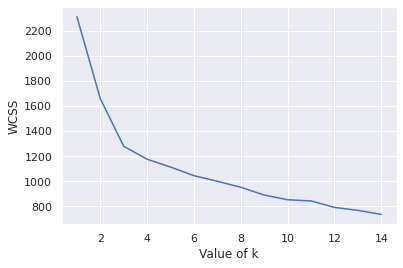

In [ ]:
# elbow-curve/WCSS
ssd = []
range_n_clusters = range(1, 15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=0)
    kmeans.fit(temp_scaled)
    
    ssd.append(kmeans.inertia_)
    
# Plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)
plt.xlabel("Value of k")
plt.ylabel("WCSS")
plt.show()

Considering the plot above for WCSS vs. K values, determining the elbow point is really easy. Clearly k = 3

Let's now try the Silhouette Analysis method to find the optimal value of k.

*   Finding the Optimal Number of Clusters
  2.   Silhouette Analysis Method

The Silhouette coefficient score for a data point is computed using the below formula:
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the data point's cluster points.

* The value of the Silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in its cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette score analysis
temp1 = []
range_n_clusters = range(2, 15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=0)
    kmeans.fit(temp_scaled)
   
    temp1.append(silhouette_score(temp_scaled, kmeans.labels_))
print(temp1)


[0.26831340971052126, 0.28594199657074876, 0.25173343011696475, 0.23187479572412723, 0.23964277899912415, 0.1977124515910614, 0.133114891253478, 0.14035373736325835, 0.14398677296462006, 0.12120889640381353, 0.1441984120256859, 0.14098681577744446, 0.13928796547886488]


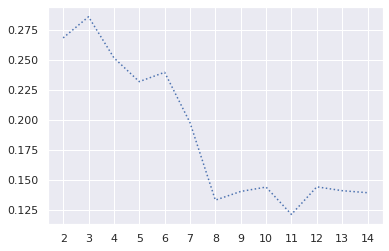

In [ ]:
#Visualizing variation in the Silhouette score
plt.plot(temp1, linestyle = 'dotted')
default_x_ticks = range(len(range_n_clusters))
plt.xticks(default_x_ticks, range_n_clusters)
plt.show()

Silhouette score is highest at k = 3

Let us visualize the Silhouette scores with SilhoetteVisualizer to better understand the distribution of Silhouette scores for different values of K in the neighborhood of the elbow point value of 3.

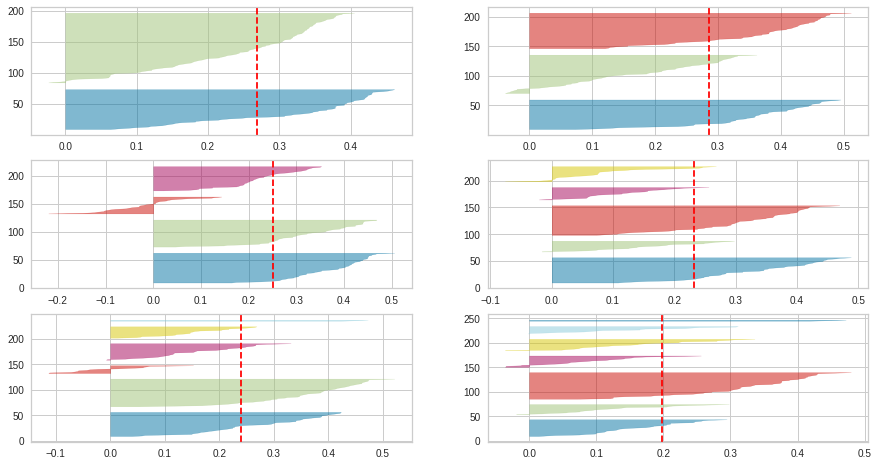

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create K-Means instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with K-Means instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(temp_scaled)
    #add title and legends

K = 3 is the minimum k that gives us a nice uniform distribution with all clusters having above-average Silhouette scores, so let's proceed with that.

In [ ]:
# Final K-Means model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
kmeans.fit(temp_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [ ]:
# Assigning the label to data points
wine_df['cluster_id'] = kmeans.labels_
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


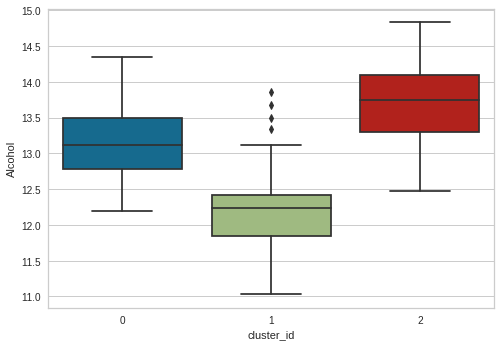

In [ ]:
# As the first step, let's plot the parameter of interest (alchohol) with different cluster ids and see if we can find a pattern.
sns.boxplot(x='cluster_id', y='Alcohol', data=wine_df)

#### Analyzing mean values for different columns to detect patterns based on cluster formation

In [ ]:
wine_df.groupby('cluster_id').agg('mean')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
cluster_id,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,2.000000,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


Some observable insights based on the clusterwise data distribution are:


* Cluster 1 is characterized by ...
*
*
*
*

#### Experimenting with other modes of Centroid Initialization


In [ ]:
# By default, the K-means algorithm applies the K-means++ centroid initialization technique to the algorithm to get better initial cluster centers.
# Now, let us check what happens when we choose random cluster center initialization

kmeansrm = KMeans(n_clusters=3, max_iter=50, init='random', random_state=0)
kmeansrm.fit(temp_scaled)

KMeans(init='random', max_iter=50, n_clusters=3, random_state=0)

In [ ]:
#Taking the labels assigned after clustering for all the data points
ymeansrm = kmeansrm.labels_

In [ ]:
labelsrm, countsrm = np.unique(ymeansrm, return_counts=True)


In [ ]:
wine_df['cluster_id_random'] = ymeansrm

In [ ]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id,cluster_id_random
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [ ]:
#Printing the mean value for all the variables with random centroid initialization
wine_df.groupby('cluster_id_random').agg('mean')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
cluster_id_random,,,,,,,,,,,,,,,
0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,1.000000
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,1.983871
2,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.000000


####**Summary**
Via the random initialization method, we observe that clusters formed have similar mean values as the KMneans++ initialization. 

There is not much appreciable change due to choice of initialization here, mostly because the dataset is of uniform density and does not have points crowded at particular locations

Let us now try a more focused approach by keeping only significant variables for the algorithm, namely 'num_orders' and 'reorder_rate'

In [ ]:
focussed_data = wine_df.drop('Class', axis = 1).copy()
#Let's scale these values for our clustering algorithm, we'll call this data frame 'scaled_df1'.
scaled_df1 = scaler.fit_transform(focussed_data)

In [ ]:
#Printing values after scaling
scaled_df1[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893,  1.1928401 ,  0.09789492],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152,  1.1928401 ,  0.09789492],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818,  1.1928401 ,  0.09789492],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383,  1.1928401 ,  0.09789492],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555, 

####Applying K-Means on the focused dataframe
For this, we'll reapply the steps of model building:

Step 1: Finding the Optimal Number of Clusters
  1.  WCSS Method




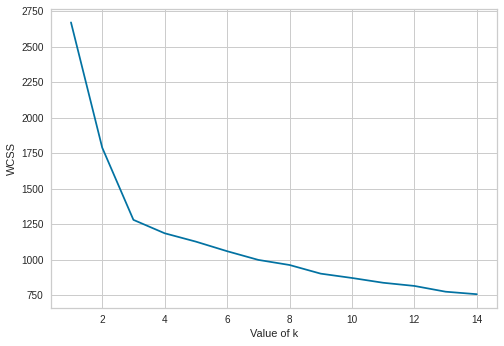

In [ ]:
# elbow-curve/WCSS
ssd = []
range_n_clusters = range(1, 15)
for num_clusters in range_n_clusters:
    kmeansv2 = KMeans(n_clusters=num_clusters, max_iter=50, init='k-means++', random_state=0)
    kmeansv2.fit(scaled_df1)
    
    ssd.append(kmeansv2.inertia_)
    
# Plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)
plt.xlabel("Value of k")
plt.ylabel("WCSS")
plt.show()

2.   Silhouette Score analysis method:



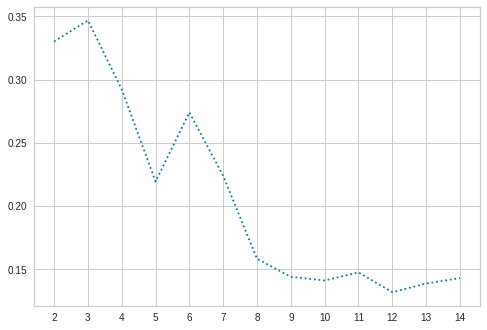

In [ ]:
# silhouette analysis
range_n_clusters = range(2,15)
temp2=[]

for num_clusters in range_n_clusters:
    
    # intialise K-Means
    kmeansv2 = KMeans(n_clusters=num_clusters, max_iter=50, init='k-means++', random_state=0)
    kmeansv2.fit(scaled_df1)
    
    cluster_labels_v2 = kmeansv2.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels_v2)
    temp2.append(silhouette_score(scaled_df1, kmeansv2.labels_))

    #print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

#Visualizing variation in the Silhouette score:
    
plt.plot(temp2, linestyle = 'dotted')
default_x_ticks = range(len(range_n_clusters))
plt.xticks(default_x_ticks, range_n_clusters)
plt.show()

In [ ]:
# Final model with k=4
kmeansv2 = KMeans(n_clusters=3, max_iter=50, init='k-means++', random_state=0)
kmeansv2.fit(scaled_df1)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [ ]:
wine_df['cluster_id_v2'] = kmeansv2.labels_
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id,cluster_id_random,cluster_id_v2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1,2


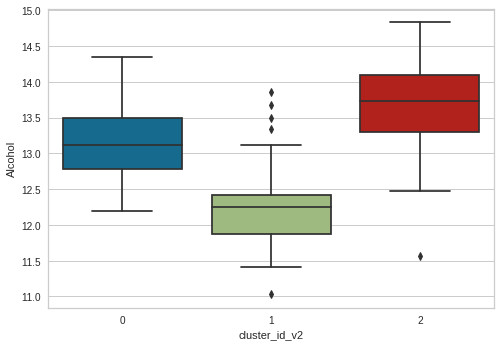

In [ ]:
# Plotting the boxplot for reorder_rate for the clusters formed
sns.boxplot(x='cluster_id_v2', y='Alcohol', data=wine_df)

#### Let us now check the mean value of different columns with the updated cluster labels.

In [ ]:
labels, counts = np.unique(kmeansv2.labels_, return_counts=True)


In [ ]:
wine_df.groupby('cluster_id_v2').agg('mean')


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id,cluster_id_random
cluster_id_v2,,,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.000000,2.0
1,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,1.000000,0.0
2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,1.983871,1.0


#### Let us now check how the clusters look like visually

In [ ]:
labels = np.unique(kmeansv2.labels_)
labels

array([0, 1, 2], dtype=int32)

In [ ]:
y_kmeansv2 = kmeansv2.fit_predict(scaled_df1)

In [ ]:
y_kmeansv2[:5]

array([2, 2, 2, 2, 2], dtype=int32)

In [ ]:
X = pd.DataFrame(scaled_df1)


In [ ]:
kmeansv2.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796, -1.33484488,  1.34255887],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618, -0.07100239, -1.14676903],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529,  1.17245555,  0.09789492]])

In [ ]:
# for i in labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()

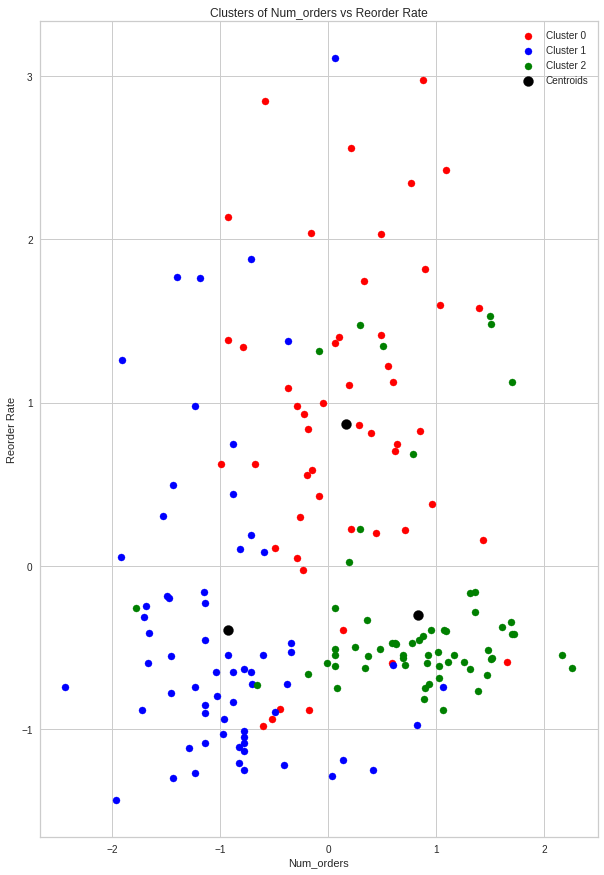

In [ ]:
plt.figure(figsize =(10, 15))

plt.scatter(X[kmeansv2.labels_== 0][0], X[kmeansv2.labels_== 0][1], s=50, c='red', label ='Cluster 0')
plt.scatter(X[kmeansv2.labels_== 1][0], X[kmeansv2.labels_== 1][1], s=50, c='blue', label ='Cluster 1')
plt.scatter(X[kmeansv2.labels_== 2][0], X[kmeansv2.labels_== 2][1], s=50, c='green', label ='Cluster 2')

plt.scatter(kmeansv2.cluster_centers_[:, 0], kmeansv2.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Clusters of Num_orders vs Reorder Rate')
plt.xlabel('Num_orders')
plt.ylabel('Reorder Rate')
plt.legend()
plt.show()




---



### Building Clustering Models - Part II
#### **2. DBSCAN**

Now that we have analyzed the clustering outputs using the K-Means algorithm, let's give DBSCAN algorithm a try to see if it could perform better.

We will be using 2-dimensional data created earlier for this demo.

In [ ]:
#Scaling the variables and storing them in a new data frame to start afresh
temp2_scaled = scaler.fit_transform(focussed_data)

In [ ]:
temp2_scaled = pd.DataFrame(temp2_scaled)
temp2_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.19284,0.097895
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.19284,0.097895
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.19284,0.097895
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.19284,0.097895
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.19284,0.097895


In [ ]:
from sklearn.cluster import DBSCAN


Recall that just as we find an optimal value for *K* for the Kmeans algorithm, we have *epsilon* and the minimum number of data points *MinPts* parameters to initialize for the DBSCAN algorithm.

Let's see how to find the optimal value for the eps(Epsilon) parameter for our use case:

Assume a value for MinPts, which is the same as k for k-nearest neighbors determination for a given point.
*   Step 1: Calculate the average of distances from a data point to its k nearest neighbors (kNN)
*   Step 2: Plot the average kNN distances for the data points in ascending order
* Step 3: Determine the focus point (elbow) with the highest curvature
* Step 4: (If required) Zoom into that range to find the optimal value for the Epsilon

Let's start with finding the optimal value for Epsilon first:



#####Finding Optimal value for Epsilon

We need to find a value of epsilon; let's plot distances against data points.

In [ ]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(temp2_scaled)
distances, indices = nbrs.kneighbors(temp2_scaled)
print(np.shape(distances))
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(temp2_scaled)
distances, indices = neighbors_fit.kneighbors(temp2_scaled)


(178, 4)


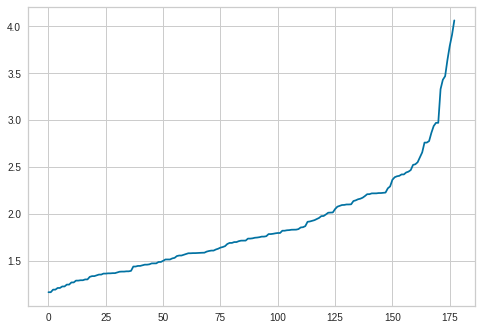

In [ ]:
# Step 3: Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
te1=pd.DataFrame(distances)
te1

,0
0,1.164114
1,1.164114
2,1.191602
3,1.191602
4,1.209356
...,...
173,3.467395
174,3.640517
175,3.789214
176,3.907597


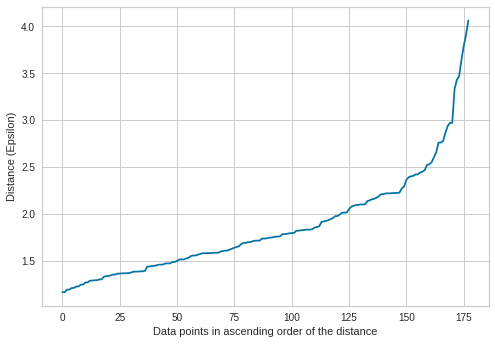

In [ ]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)
plt.ylabel("Distance (Epsilon)")
plt.xlabel("Data points in ascending order of the distance")
plt.show()


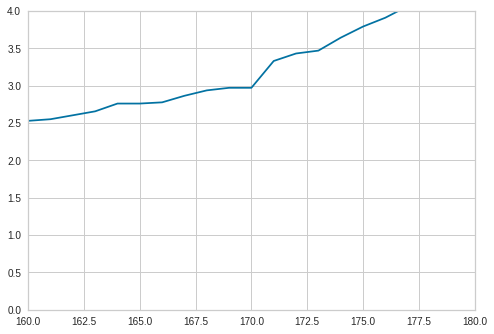

In [ ]:
#Zooming into the area of interest
plt.plot(distances)
plt.xlim([160,180])
plt.ylim([0,4])
plt.show()


As the plot above shows, there is an elbow point at a distance value of around 3, so we can take eps=3.

##### Determining the MinPts value:
There is no plotting method or an automatic indicator to find a value for the MinPts parameter. 

A general rule of thumb based on the research done in this area entails the following:

*   Choose a large MinPts value if dataset has noise
*   For larger datasets choose MinPts = 2*(number of dimensions) (Sander et al., 1998)
* For 2D datasets, choose MinPts value = 4 (Ester et al., 1996)



In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=3, min_samples=4).fit(temp2_scaled)
labels = db.labels_

wine_df['cluster_label_dbscan'] = db.labels_

In [ ]:
#Label -1 is designated for outliers and the rest of the labels are used for the clusters formed
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([ 14, 115,  49]))

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
#colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

In [ ]:
r = plt.scatter(temp2_scaled[1], temp2_scaled[2], color ='r');
g = plt.scatter(temp2_scaled[1], temp2_scaled[2], color ='g');
#b = plt.scatter(temp2_scaled['F1'], temp2_scaled['F2'], color ='b');
k = plt.scatter(temp2_scaled[1], temp2_scaled[2], color ='k');
plt.clf()

<Figure size 576x396 with 0 Axes>

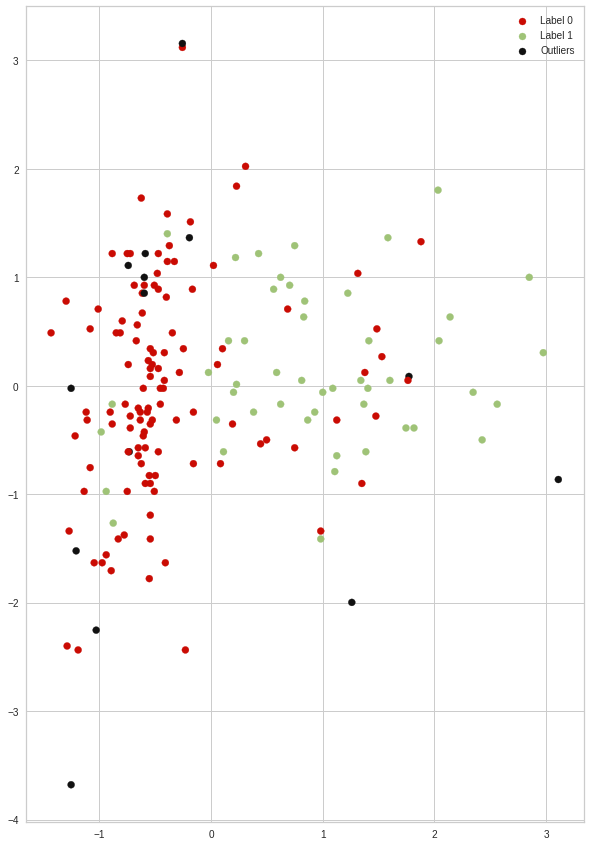

In [ ]:
plt.figure(figsize =(10, 15))
plt.scatter(temp2_scaled[1], temp2_scaled[2], c = cvec)

# plt.yscale("symlog")

# Building the legend
plt.legend([r, g, k], ['Label 0', 'Label 1', 'Outliers'])
  
plt.show()

# DBSCAN formed 2 clusters and identified outliers as well!

In [ ]:
wine_df.groupby('cluster_label_dbscan').agg('mean')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id,cluster_id_random,cluster_id_v2
cluster_label_dbscan,,,,,,,,,,,,,,,,,
-1,2.142857,12.652857,2.152143,2.324286,20.907143,113.357143,2.560714,2.125714,0.319286,2.152143,4.446429,0.963571,2.690000,625.857143,1.000000,0.500000,1.071429
0,1.486957,12.999565,1.916696,2.354261,18.622609,98.452174,2.540870,2.540000,0.329913,1.735652,4.294522,1.067704,2.995043,816.460870,1.513043,0.513043,1.513043
1,2.938776,13.102449,3.373878,2.407347,21.138776,98.877551,1.642449,0.803061,0.448980,1.090816,7.024898,0.696939,1.689592,618.204082,0.000000,2.000000,0.000000


Summarizing DBSCAN results <br>
Compared to the KMeans algorithm, DBSCAN algorithm showed us the following improvements:


*

*

*

